In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [11]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# dop the unnecessary features
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


We can identify only two variable are categorical and remaining others are numerical one. There is no null values containing in dataset.
The dimension of dataset is 1000 * 11 


In [6]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## Exploratory Data Analysis 

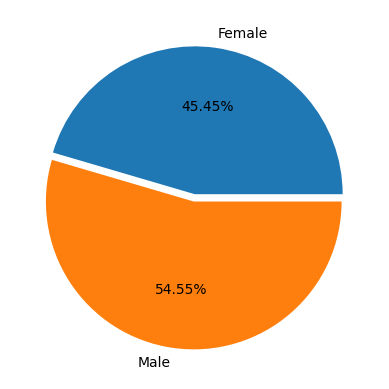

In [10]:
cr_gen = df.groupby('Gender')['CreditScore'].sum().reset_index()
plt.pie(x=cr_gen['CreditScore'],labels=cr_gen['Gender'],explode=[0,.05],autopct='%.2f%%')
plt.show()

This pie chart shows that credi score of male seems to be good in comparison to male on average. 

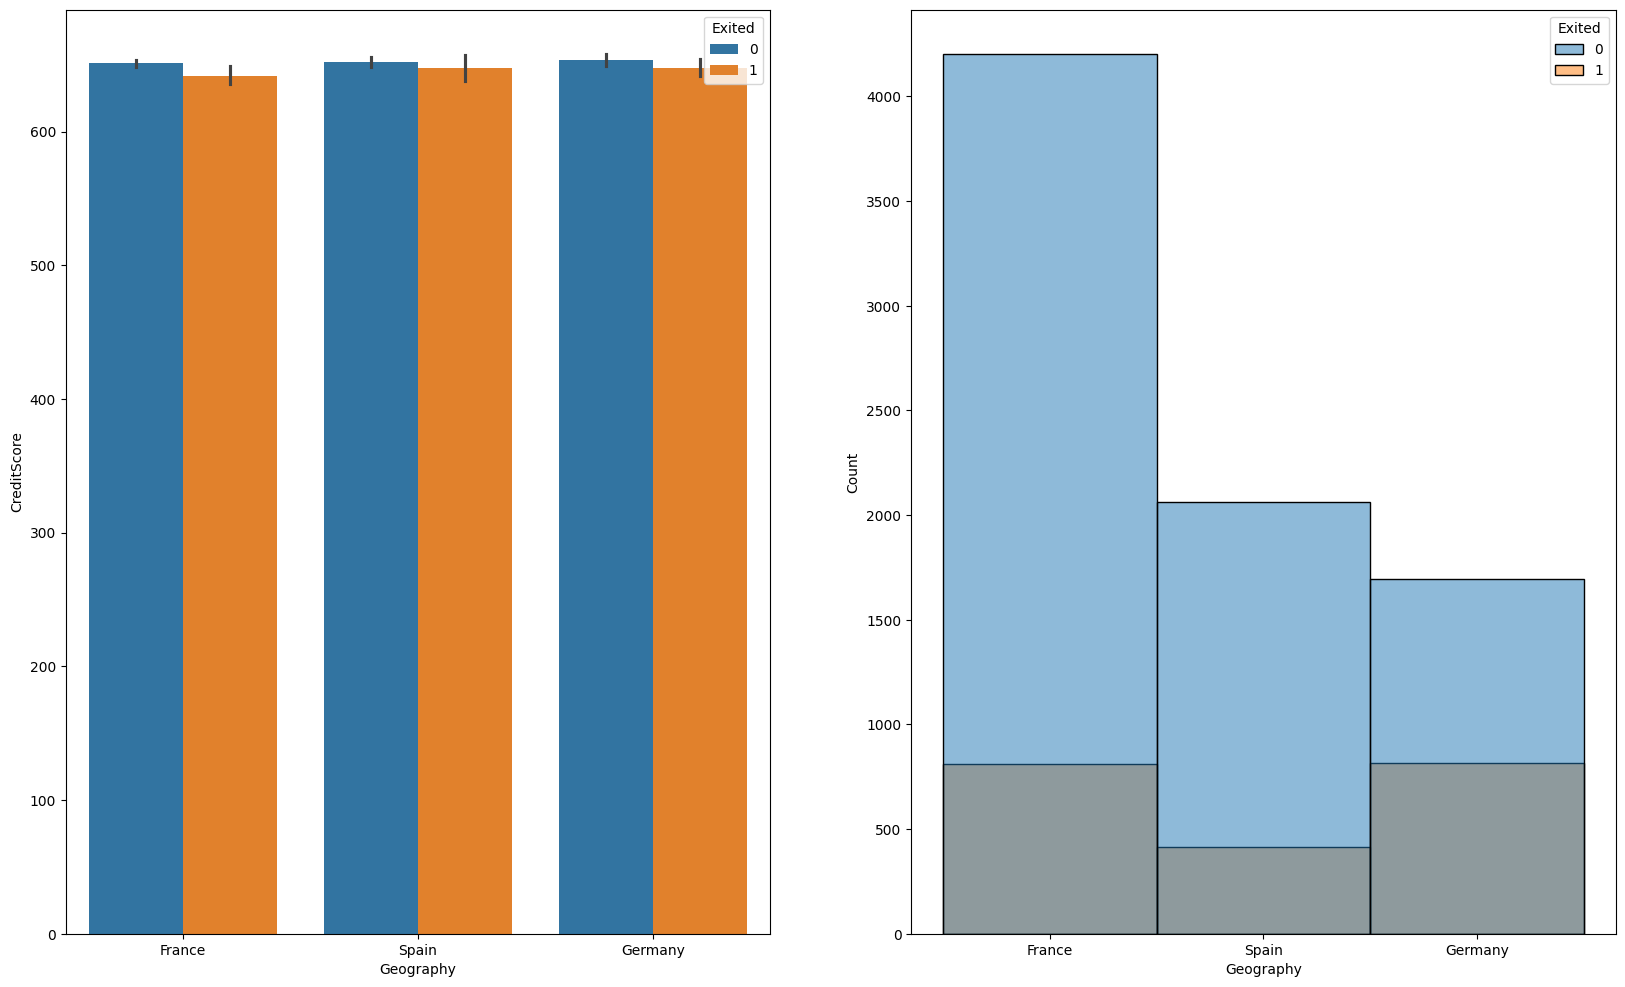

In [42]:
# let's check the distribution of Geography columns based on exited and credit score . 
fig,ax = plt.subplots(1,2,figsize=(20,12))
plt.subplot(1,2,1)
sns.barplot(df,x='Geography',y='CreditScore',hue='Exited')
plt.subplot(1,2,2)
sns.histplot(df,x='Geography',hue='Exited')
plt.show()

## Insights:
- Distribution of France, spain , germany are in decreasing order. However, The number of quiting jobs from the germany and france is slightly higher than that of Spain.
- The proportion of job quiting from each place is same along with still in job with respect to credit score. 

In [49]:
# Let's analysis the numerical variable
df_num = df.select_dtypes(exclude='O')

In [51]:
df_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


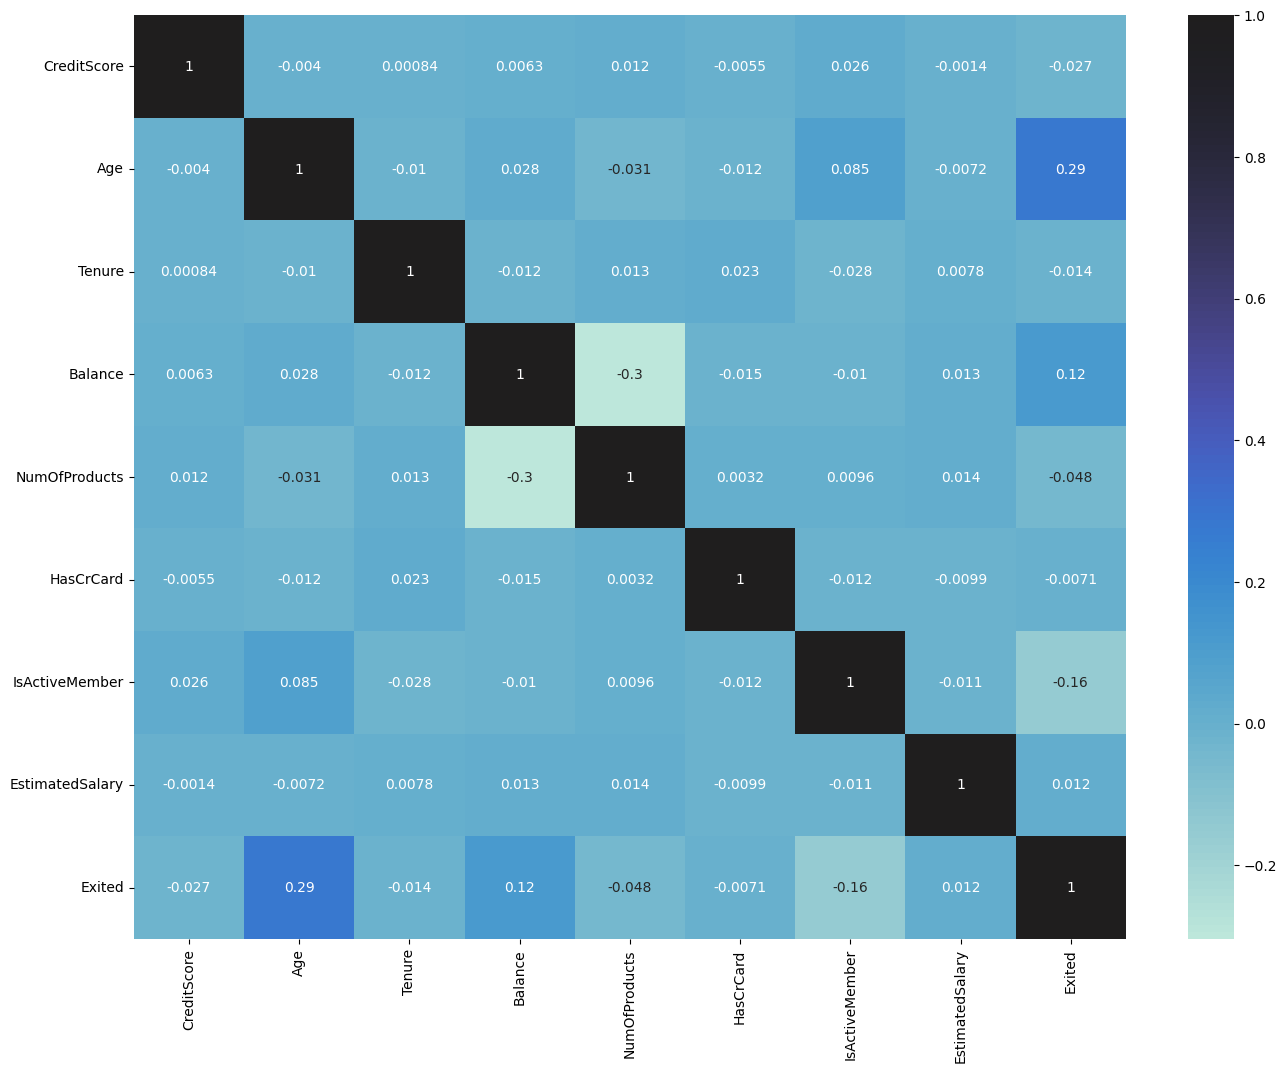

In [60]:
# let's use heat map to check how they are co-related to exited 
plt.figure(figsize=(16,12))
sns.heatmap(df_num.corr(),center=True,annot=True)
plt.show()

In [61]:
# There is no column , that is highly correlated to each other 

In [5]:
#'label Encoder' for 
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
geo_encode = ohe.fit_transform(df[['Geography']]).toarray()

In [7]:
geo_df = pd.DataFrame(geo_encode,columns=ohe.get_feature_names_out())

In [10]:
geo_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [8]:
# combine one hot encoer columns with original data 
flt_df = pd.concat([df.drop('Geography',axis=1),geo_df],axis=1)

In [9]:
flt_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [10]:
# save the encoder and scaler 
import pickle as pkl 
with open('preprocessing/label_enc.pkl','wb') as file :
    pkl.dump(lb,file)

with open('preprocessing/ohe_enc.pkl','wb') as file :
    pkl.dump(ohe,file)

In [11]:
# partition the dataset 
X = flt_df.drop('Exited',axis=1)
y = flt_df['Exited']


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# split the data in training and testing sets 
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# scale the features 
scaler = StandardScaler()
X_scale_train = np.array(scaler.fit_transform(X_train))
X_scale_test = np.array(scaler.transform(X_test))




In [16]:
# save the scaler file 
with open('preprocessing/scaler.pkl','wb') as file:
    pkl.dump(scaler,file)

## ANN Implementation 

In [13]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime



In [41]:
# BUid model 
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/milandangi/Desktop/Churn-Detection-System/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
## compile the model 
#define the optimizer 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer = optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [45]:
# Setup the tensorboard 
log_dir = "logs/fit"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tf_callback = TensorBoard(log_dir,histogram_freq=1)

In [46]:
# set up early stopping 
#patience means wait until 5 epocs before stopping training 
early_stop_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [47]:
# train the model 
history = model.fit(
    X_scale_train,
    y_train,
    validation_data= (X_scale_test,y_test),
    epochs = 100,
    callbacks = [tf_callback, early_stop_callback],
    verbose = 1
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7884 - loss: 0.4756 - val_accuracy: 0.8125 - val_loss: 0.4231
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8043 - loss: 0.4387 - val_accuracy: 0.8150 - val_loss: 0.4221
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8056 - loss: 0.4447 - val_accuracy: 0.8120 - val_loss: 0.4236
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8085 - loss: 0.4428 - val_accuracy: 0.8155 - val_loss: 0.4390
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8052 - loss: 0.4593 - val_accuracy: 0.8075 - val_loss: 0.4237
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8056 - loss: 0.4736 - val_accuracy: 0.8085 - val_loss: 0.4370
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8054 - loss: 0.4649 - val_accuracy: 0.8090 - val_loss: 0.4706
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7949 - loss: 0.5085 - 

In [48]:
model.save('model.h5')

In [49]:
# Load tensorboard Extension 
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit20251106-121023

### Testing 

In [2]:
# load trained model 
from tensorflow.keras.models import load_model
import pickle

model = load_model('model.h5')

# load the encoder and scaler 
with open('preprocessing/label_enc.pkl','rb') as obj:
    lb_enc = pickle.load(obj)

with open('preprocessing/ohe_enc.pkl','rb') as obj:
    ohe_enc = pickle.load(obj)

with open('preprocessing/scaler.pkl','rb') as obj:
    scaler = pickle.load(obj)


2025-11-06 16:03:22.777371: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-06 16:03:22.777551: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-06 16:03:22.777558: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-06 16:03:22.777998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-06 16:03:22.778019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [41]:
input_data = {
'CreditScore':700,
 'Geography':'Spain',
 'Gender':'Male',
 'Age': 34,
 'Tenure':3,
 'Balance': 36815.64,
 'NumOfProducts': 2,
 'HasCrCard': 1,
 'IsActiveMember':1,
 'EstimatedSalary':70041.95,
}

In [45]:
pd.Series(input_data)

CreditScore             700
Geography             Spain
Gender                 Male
Age                      34
Tenure                    3
Balance            36815.64
NumOfProducts             2
HasCrCard                 1
IsActiveMember            1
EstimatedSalary    70041.95
dtype: object

In [67]:
test_data = pd.DataFrame(input_data,index=[0])

In [68]:
test_data['Gender'] = lb_enc.transform(test_data['Gender'])

In [69]:
x = ohe_enc.transform([test_data['Geography'],]).toarray()

/Users/milandangi/Desktop/Churn-Detection-System/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [70]:
test_geo_enc = pd.DataFrame(x,columns=ohe_enc.get_feature_names_out())

In [72]:
test_data = pd.concat([test_data.drop('Geography',axis=1),test_geo_enc],axis=1)

In [74]:
test_data = scaler.transform(test_data)

In [75]:
test_data 

array([[ 0.50178794,  0.91324755, -0.46564102, -0.69539349, -0.62901573,
         0.80843615,  0.64920267,  0.97481699, -0.52836943, -0.99850112,
        -0.57946723,  1.73494238]])

In [83]:
# prediction 
prediction = model.predict(test_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [86]:
prediction_prob = prediction[0][0]

In [88]:
if prediction_prob > 0.5:
    print("Employer is likely to get churn")
else:
    print("Employer be on company")

Employer be on company
